<a href="https://colab.research.google.com/github/XtosT3/XtosT3/blob/main/heartfailure_decisiontree_w_pca_parametertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Identification** 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations
* Duplicated: 272 observations

A classification machine learning model will be utilized. The classifier will be a decision tree classifier. This model is interpretable, does not require feature scaling, and is effective of linear and non-linear problems. However, in this problem feature scaling will still be applied to strengthen the prediction.

**Attribute Information**
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

**Import libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Import Data**

In [4]:
# Set a filepath for the dataset

dataset = pd.read_csv("heart.csv")

**Data Analysis** Correlations and distributions in the data are to be unveiled. 

In [5]:
print("Missing entries in dataset:")
print(dataset.isnull().sum())

Missing entries in dataset:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


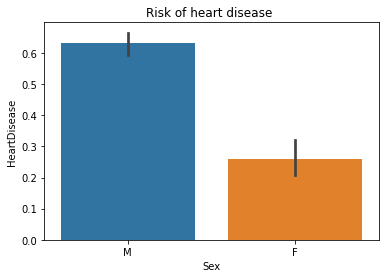

In [6]:
plt.title("Risk of heart disease ")
plt.ylabel("Heart Disease")
plt.xlabel("Sex")
sns.barplot( x = dataset["Sex"], y = dataset["HeartDisease"])

From this bargraph it is clear that men in this dataset are at higher risk of cardiovascular disease than the women in this dataset. 

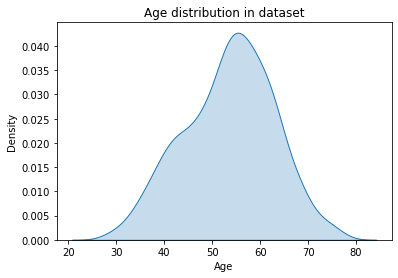

In [7]:
plt.title("Age distribution in dataset")
plt.xlabel("Age")
sns.kdeplot(data = dataset["Age"], shade = True)
plt.show()

Age is normally distributed around with the highest density around late 50s to early 60s. This is to be expected as it is around this age that cardiovascular disease become a real threat for majority of the population.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


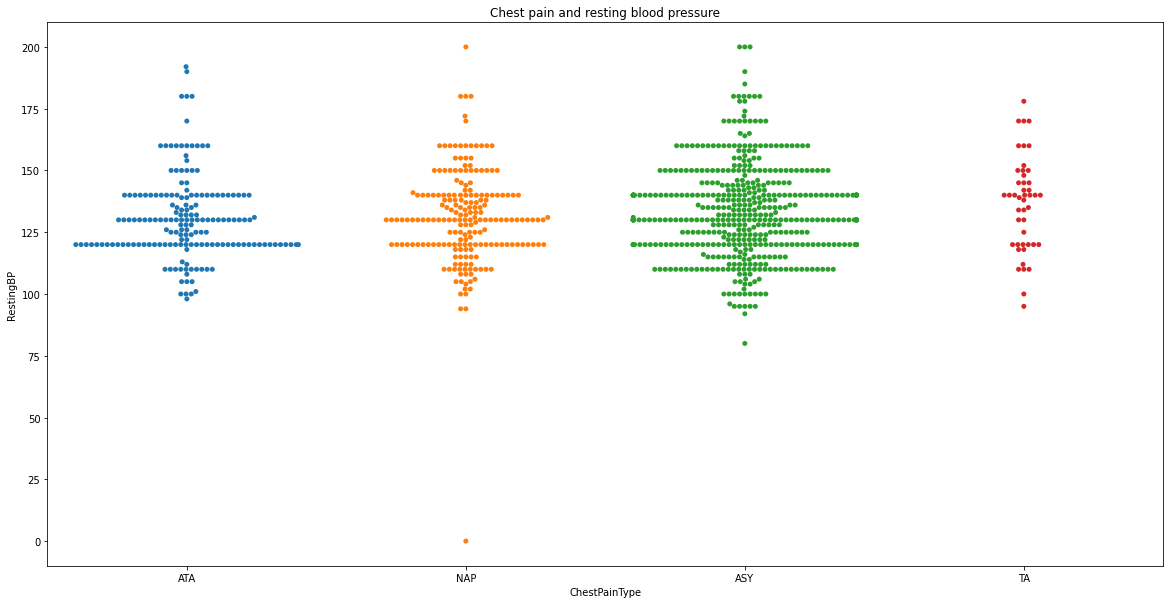

In [8]:
plt.figure(figsize = (20,10))
plt.title("Chest pain and resting blood pressure")
plt.ylabel("Resting blood pressure (mm Hg)")
plt.xlabel("Chest pain type")
sns.swarmplot(x = dataset["ChestPainType"], y = dataset["RestingBP"])
plt.show()

The types of chest pains all appear to fall within a similar range. Asymptomatic pain however, does have a greater occurance at all ranges.

**Create independent matrix of features (X) and dependent variable vector (y)**

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
print(X)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [11]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

**Encoding categorical data**

First the catergorical data and numerical data in X will be seperated/split.

In [12]:
X_numerical = dataset.iloc[:,[0,3,4,5,7,9,]].values
X_categorical = dataset.iloc[:,[1,2,6,8,10]]

In [13]:
#Encoding X_categorical

orginalNumOfColsOfX_categorical = X_categorical.shape[1]
for i in range(X_categorical.shape[1]): 
    currNumOfColsOfX_categorical = X_categorical.shape[1]
    indexOfColumnToEncode = currNumOfColsOfX_categorical - orginalNumOfColsOfX_categorical + i
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [indexOfColumnToEncode])], remainder='passthrough', sparse_threshold=0)
    X_categorical = np.array(ct.fit_transform(X_categorical)) 

In [14]:
# Concatenate the X_numerical and X_categorical together

X = np.concatenate((X_numerical,X_categorical), axis=1)

In [15]:
print(X)

[[40.0 140.0 289.0 ... 0.0 0.0 1.0]
 [49.0 160.0 180.0 ... 1.0 0.0 0.0]
 [37.0 130.0 283.0 ... 0.0 0.0 1.0]
 ...
 [57.0 130.0 131.0 ... 0.0 0.0 1.0]
 [57.0 130.0 236.0 ... 0.0 0.0 0.0]
 [38.0 138.0 175.0 ... 1.0 0.0 1.0]]


**Split the data into a training and test set**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Apply feature scaling** If not scaled, the features with high values will start dominating when calculating distances and will therefore become the prodominate features in the model. Decision tree models don't have to be scaled, but we will perform feature scaling to try improve the accuracy.

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Principle Component Analysis** Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. It is recommended in tree classifications to reduce the dimensionality and improve the models ability to predict.

In [18]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

**Training the decision tree classification on the training set**

In [19]:
# Parameters: quality of split is measured by entropy.

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Making predictions and calculating the accuracy**

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 69  23]
 [ 33 105]]


0.7565217391304347

An accuracy of 76% is not ideal however, the parameters have not been tuned yet and better results are to be expected once the grid search for the best parameters and accuracy has been completed.

**Hypertune the parameters** A k-fold cross validation will be performed then a grid search to find the best model and parameters. These tests can help us identify the robustness of the model.

**The k-fold cross validation**

In [22]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.78 %
Standard Deviation: 2.84 %


**The grid search**

In [23]:
classifier.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [24]:
parameters = [{"criterion":["gini", "entropy"], "max_depth":range(1, 20),
               "min_samples_leaf":range(1,10)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.48 %
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8}


Our best model was run when 'gini' was used as the citerion to split the nodes and not 'entropy'. Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. The best accuracy was 84.88% with Gini impurity, a max depth of 3 and a minimum sample leaves of 8.